In [26]:
from sklearn.datasets import load_iris

# 1. Import data

In [27]:
iris = load_iris()
print(iris.feature_names) # we will take iris features 2 and 3

X = iris["data"][:, (2, 3)] 
y = iris["target"]

setosa_or_versicolor = (y == 0) | (y == 1)

X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


# 2. Train the three models

In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier

C = 1.0
alpha = 1 / (len(X) * C) # this value of alpha with loss="hinge" make the SGDclassifier similars to a Linear Classifier

lin_clf = LinearSVC(loss="hinge",C=C)
svc_clf = SVC(kernel="linear", C=C)
sgd_clf = SGDClassifier(loss="hinge", alpha=alpha)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

models = [lin_clf, svc_clf, sgd_clf]
for model in models:
    model.fit(X_scaled, y)

/Users/geoffroygobert/anaconda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


# How to find intercept and slope?

In [29]:
%%latex
For a classificator with a linear model we have:
\[
    \hat{y}	(w, x) = wx + w_0
\]
With:
$\hat{y} (w, x)$ predicted class like {'setosa', 'versicolor'} but numerical so {0, 1}\[\]

$x$ input vector so in our case \begin{pmatrix}
        pentalLength \\
        petalWidth
    \end{pmatrix}\[\]
    
$w$ weight of each feature in our linear regression\[\]

In our case we have 2 dimensions (2 inputs features: petal lenght, petal weight):
\[
    \hat{y}	(w, x) =  
        \begin{pmatrix}
           w_1 \\
           w_2
        \end{pmatrix}x + w_0
\]

We can also write it like:

\[
    \hat{y}	(w, x) = w_{0} + w_{1}x_{1} + w_{2}x_{2} + .... + w_{n}x_{n}
\]

\[\]To draw this model we want:
\[
    x_2 = a.f(x_1) + b
\]  

We also have a case where $\hat{y} (w, x) = 0$ (we centered the data) so:
\[
    0 = w_0 + w_1x_1 + w_2x_2
\]


\[\]\[
    x_2 = - \frac{w_1}{w_2}x_1 - \frac{w_0}{w_2}
\]  


<IPython.core.display.Latex object>

# 4. Visualize models and the datapoints

In [30]:
X_setosa = X[y == 0]
y_setosa = y[y == 0]
X_versicolor = X[y == 1]
y_versicolor = y[y == 1]

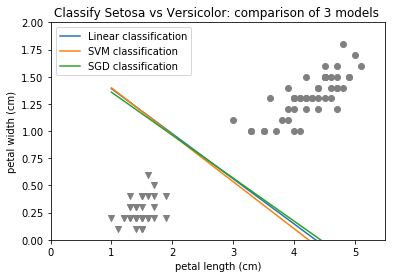

In [31]:
import numpy as np
import matplotlib.pyplot as plt

# Draw datapoints
plt.scatter(X_setosa[:,0], X_setosa[:,1], marker="v", color='grey')
plt.scatter(X_versicolor[:,0], X_versicolor[:,1], marker="o", color='grey')

x_min = X_scaled.min()
x_max = X_scaled.max()

# Draw each model. Compute first intercept and slope
for model in models:
    w0 = model.intercept_[0]
    w1 = model.coef_.flatten()[0]
    w2 = model.coef_.flatten()[1]
    
    a = - w1 / w2
    b = - w0 / w2

    x = np.linspace(x_min, x_max)
    y = x * a + b
    
    x_origin_scale, y_origin_scale = scaler.inverse_transform(np.array([x, y]).T).T
    
    plt.plot(x_origin_scale, y_origin_scale)

# Graph format
plt.legend(['Linear classification', 'SVM classification', 'SGD classification'])
plt.title('Classify Setosa vs Versicolor: comparison of 3 models ')
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.axis([0, 5.5, 0, 2])
plt.show()

We can see on the graph that the 3 models are pretty similar.